In [ ]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision"

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import tensorflow_hub as hub
print(hub.__version__)
print("GPU", "available" if tf.config.list_physical_devices else "NO")

0.13.0
GPU available


In [3]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")

In [4]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

<Axes: >

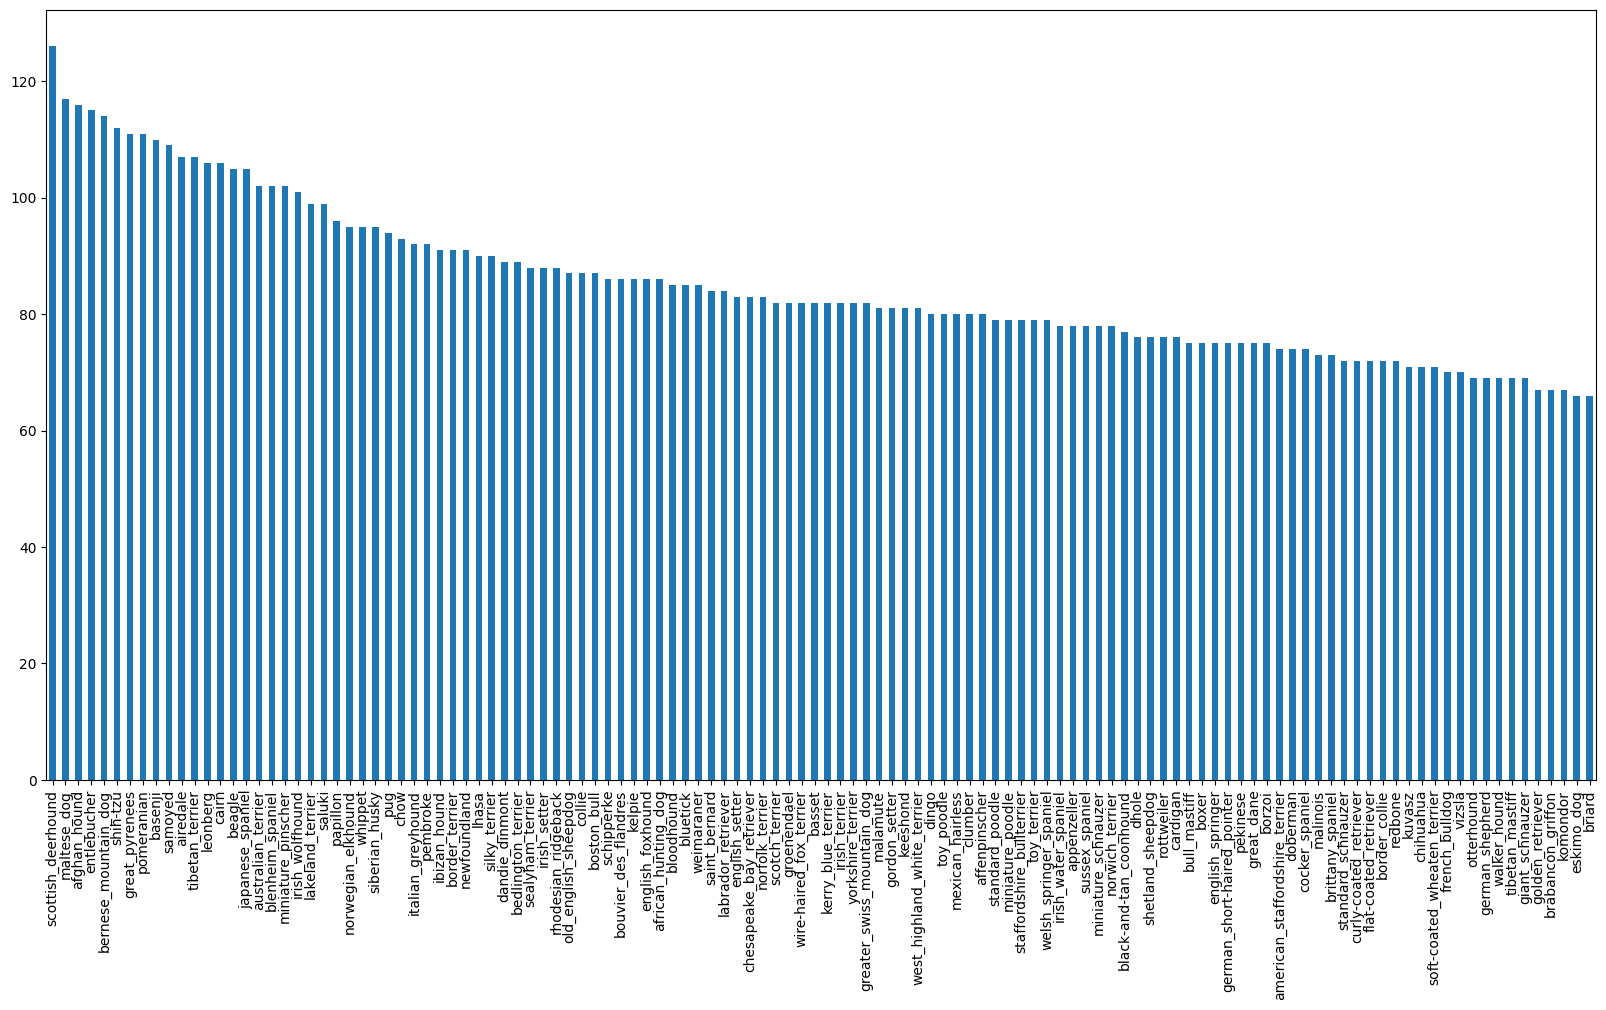

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10))

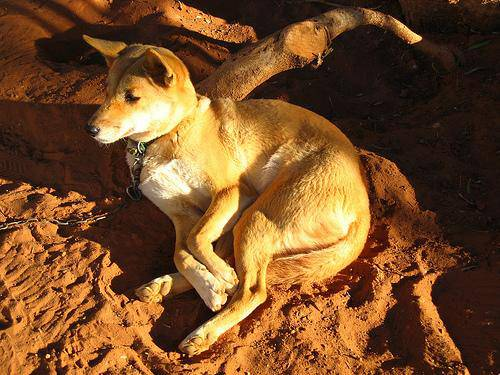

In [6]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [7]:
print(labels_csv.head(10))

                                 id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound


In [8]:
# Assigning filenames 
filenames = ["/content/drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
import os
if len(os.listdir("/content/drive/MyDrive/Dog Vision/train")) == len(filenames):
  print("yea")
  
else: print ("No")

yea


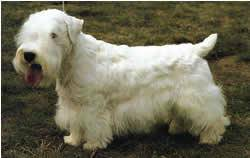

In [10]:
Image(filenames[6969])

In [11]:
labels_csv.breed[6969]

'sealyham_terrier'

In [12]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
if len(labels) == len(filenames):
  print("yes ")
else: print ("no")

yes 


In [15]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [16]:
len(unique_breeds)

120

In [17]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

In [20]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
print(labels[3])
print(boolean_labels[3].astype(int))

bluetick
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
NUM_IMAGES = 1000 #@param {type:"slider", min=1000, max=10000, step=1000}

In [23]:
X = filenames
y = boolean_labels

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)
len(X_train), len(y_train), len(y_val), len(X_val)

(800, 800, 200, 200)

In [25]:
from matplotlib.pyplot import imread
img = imread(filenames[99])
img.shape

(378, 500, 3)

In [26]:
tf.constant(img)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 8, 14, 36],
        [24, 30, 52],
        [ 1,  7, 29],
        ...,
        [ 7, 14, 20],
        [ 7, 14, 20],
        [ 7, 14, 20]],

       [[ 6, 14, 35],
        [34, 40, 62],
        [16, 22, 44],
        ...,
        [ 9, 14, 18],
        [ 9, 14, 18],
        [ 9, 14, 18]]], dtype=uint8)>

FUNCTION TO CREATE TENSORS FROM IMGs

In [27]:
IMG_SIZE = 224

def process_image(image_path, img_size = IMG_SIZE):
  #Read an Img File
  image = tf.io.read_file(image_path)
  #turn jpeg to numerical tensor with RGB Channels
  image = tf.image.decode_jpeg(image, channels=3)
  #COnvert 0-255 from range bw 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #RESIZE
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image


In [28]:
def get_image_label(image_path, label):
  #Takes file pathname and label processes the image and returns tuple "(image, label)"
  image = process_image(image_path)
  return image, label

In [29]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [30]:

# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [31]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [32]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

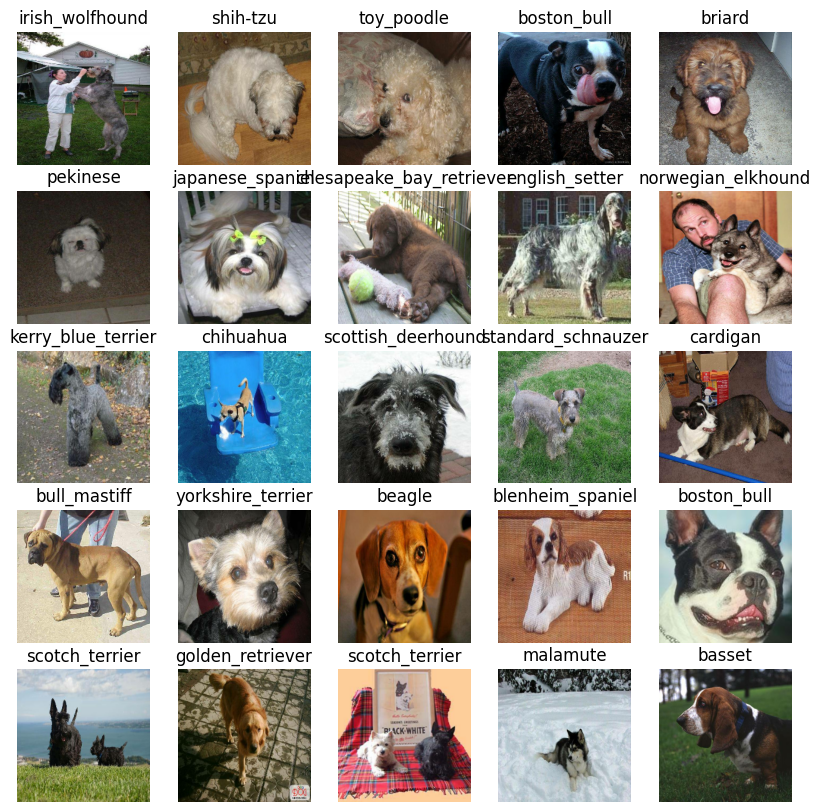

In [33]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

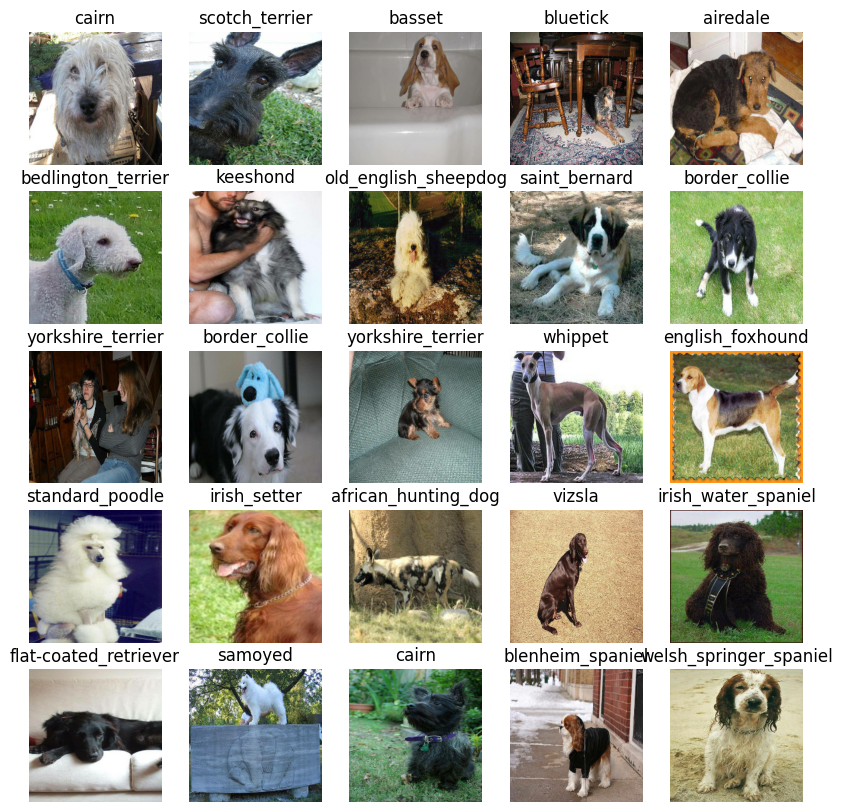

In [34]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [35]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [36]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [37]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [38]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [39]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).


In [40]:

# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Training a model (on a subset of data)
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

In [41]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [42]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Create a model using create_model().
Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
Return the fitted model.

In [43]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [45]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 11s 203ms/step - loss: 4.5196 - accuracy: 0.0975 - val_loss: 3.4812 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 5s 199ms/step - loss: 1.6116 - accuracy: 0.6888 - val_loss: 2.1516 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 3s 124ms/step - loss: 0.5563 - accuracy: 0.9362 - val_loss: 1.6881 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2485 - accuracy: 0.9900 - val_loss: 1.5096 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 3s 114ms/step - loss: 0.1477 - accuracy: 0.9962 - val_loss: 1.4100 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 4s 151ms/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 1.3861 - val_accuracy: 0.6500
Epoch 7/100
25/25 [=============================

In [46]:
%tensorboard --logdir drive/My\ Drive/Data/logs

<IPython.core.display.Javascript object>

In [47]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 31s 256ms/step


array([[1.0826740e-03, 2.6141212e-04, 1.1482773e-03, ..., 4.4024954e-04,
        2.1195332e-05, 1.5597860e-03],
       [7.9021940e-04, 1.5623883e-03, 1.3770072e-02, ..., 2.5893166e-04,
        3.2471749e-03, 2.4284185e-04],
       [8.2573513e-07, 3.7605270e-05, 6.2192216e-06, ..., 7.6633978e-06,
        5.8250762e-06, 5.8755046e-05],
       ...,
       [9.3002973e-06, 6.1696468e-05, 9.8612029e-05, ..., 5.7342731e-06,
        7.8968798e-05, 3.6966572e-05],
       [1.9292433e-03, 2.0424614e-04, 1.3625489e-04, ..., 2.8125496e-04,
        3.8822753e-05, 1.7357303e-02],
       [1.1193560e-03, 5.0520011e-05, 1.2568652e-03, ..., 6.3029225e-03,
        1.0346291e-03, 3.7351815e-04]], dtype=float32)

In [48]:
predictions.shape

(200, 120)

In [49]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[1.08267402e-03 2.61412119e-04 1.14827731e-03 2.78444804e-05
 1.04466325e-03 1.96008696e-05 9.14830621e-03 1.09590539e-04
 2.47579912e-04 1.21555524e-03 1.24430400e-03 3.18028848e-04
 2.37781918e-04 5.24145944e-05 1.75577443e-04 8.78511579e-04
 1.02581107e-04 8.09476078e-02 3.04018249e-05 2.38393724e-04
 2.74355756e-03 3.18919803e-04 6.68422726e-05 1.48746069e-03
 9.12454416e-05 2.04325348e-04 1.56312540e-01 1.07055246e-04
 1.35795411e-03 1.04094087e-03 8.25933676e-05 1.19634694e-03
 5.10969781e-04 1.60242726e-05 1.20698918e-04 5.75419441e-02
 1.31124558e-04 2.05574222e-04 3.54568292e-05 1.46762439e-04
 2.28290888e-03 6.90723537e-05 3.59346246e-04 1.23993115e-04
 6.08242044e-05 1.74303408e-04 6.99631128e-05 1.08073570e-03
 4.48402157e-03 1.57379938e-04 5.79856103e-04 7.34167770e-05
 2.72228336e-03 9.37760749e-04 5.40997949e-04 1.97393074e-05
 2.79735978e-04 4.05736314e-03 1.43909041e-04 1.13145746e-01
 3.25442321e-04 5.19101231e-05 1.23830524e-03 3.08382296e-05
 5.51490346e-04 1.831234

In [50]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'standard_schnauzer'

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().

In [51]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [52]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

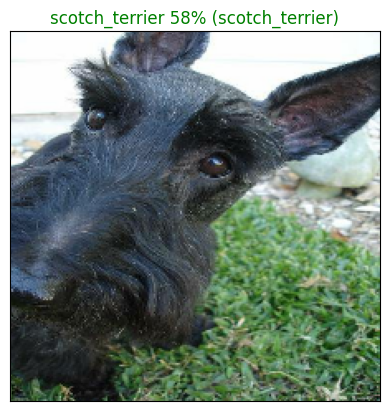

In [53]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

The function will:

Take an input of a prediction probabilities array, a ground truth labels array and an integer.
Find the predicted label using get_pred_label().
Find the top 10:
Prediction probabilities indexes
Prediction probabilities values
Prediction labels
Plot the top 10 prediction probability values and labels, coloring the true label green.

In [54]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

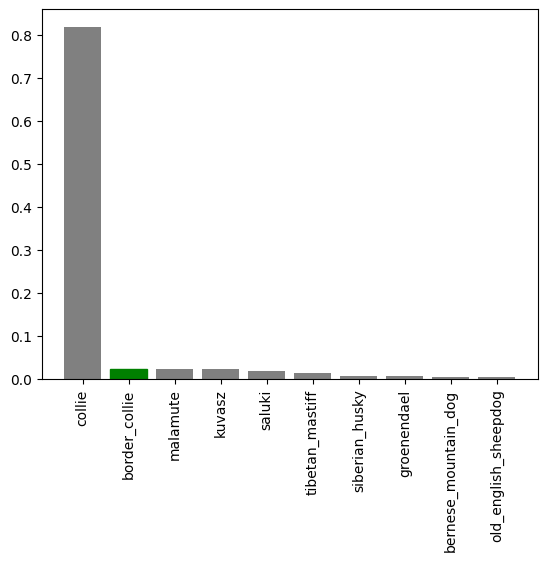

In [62]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

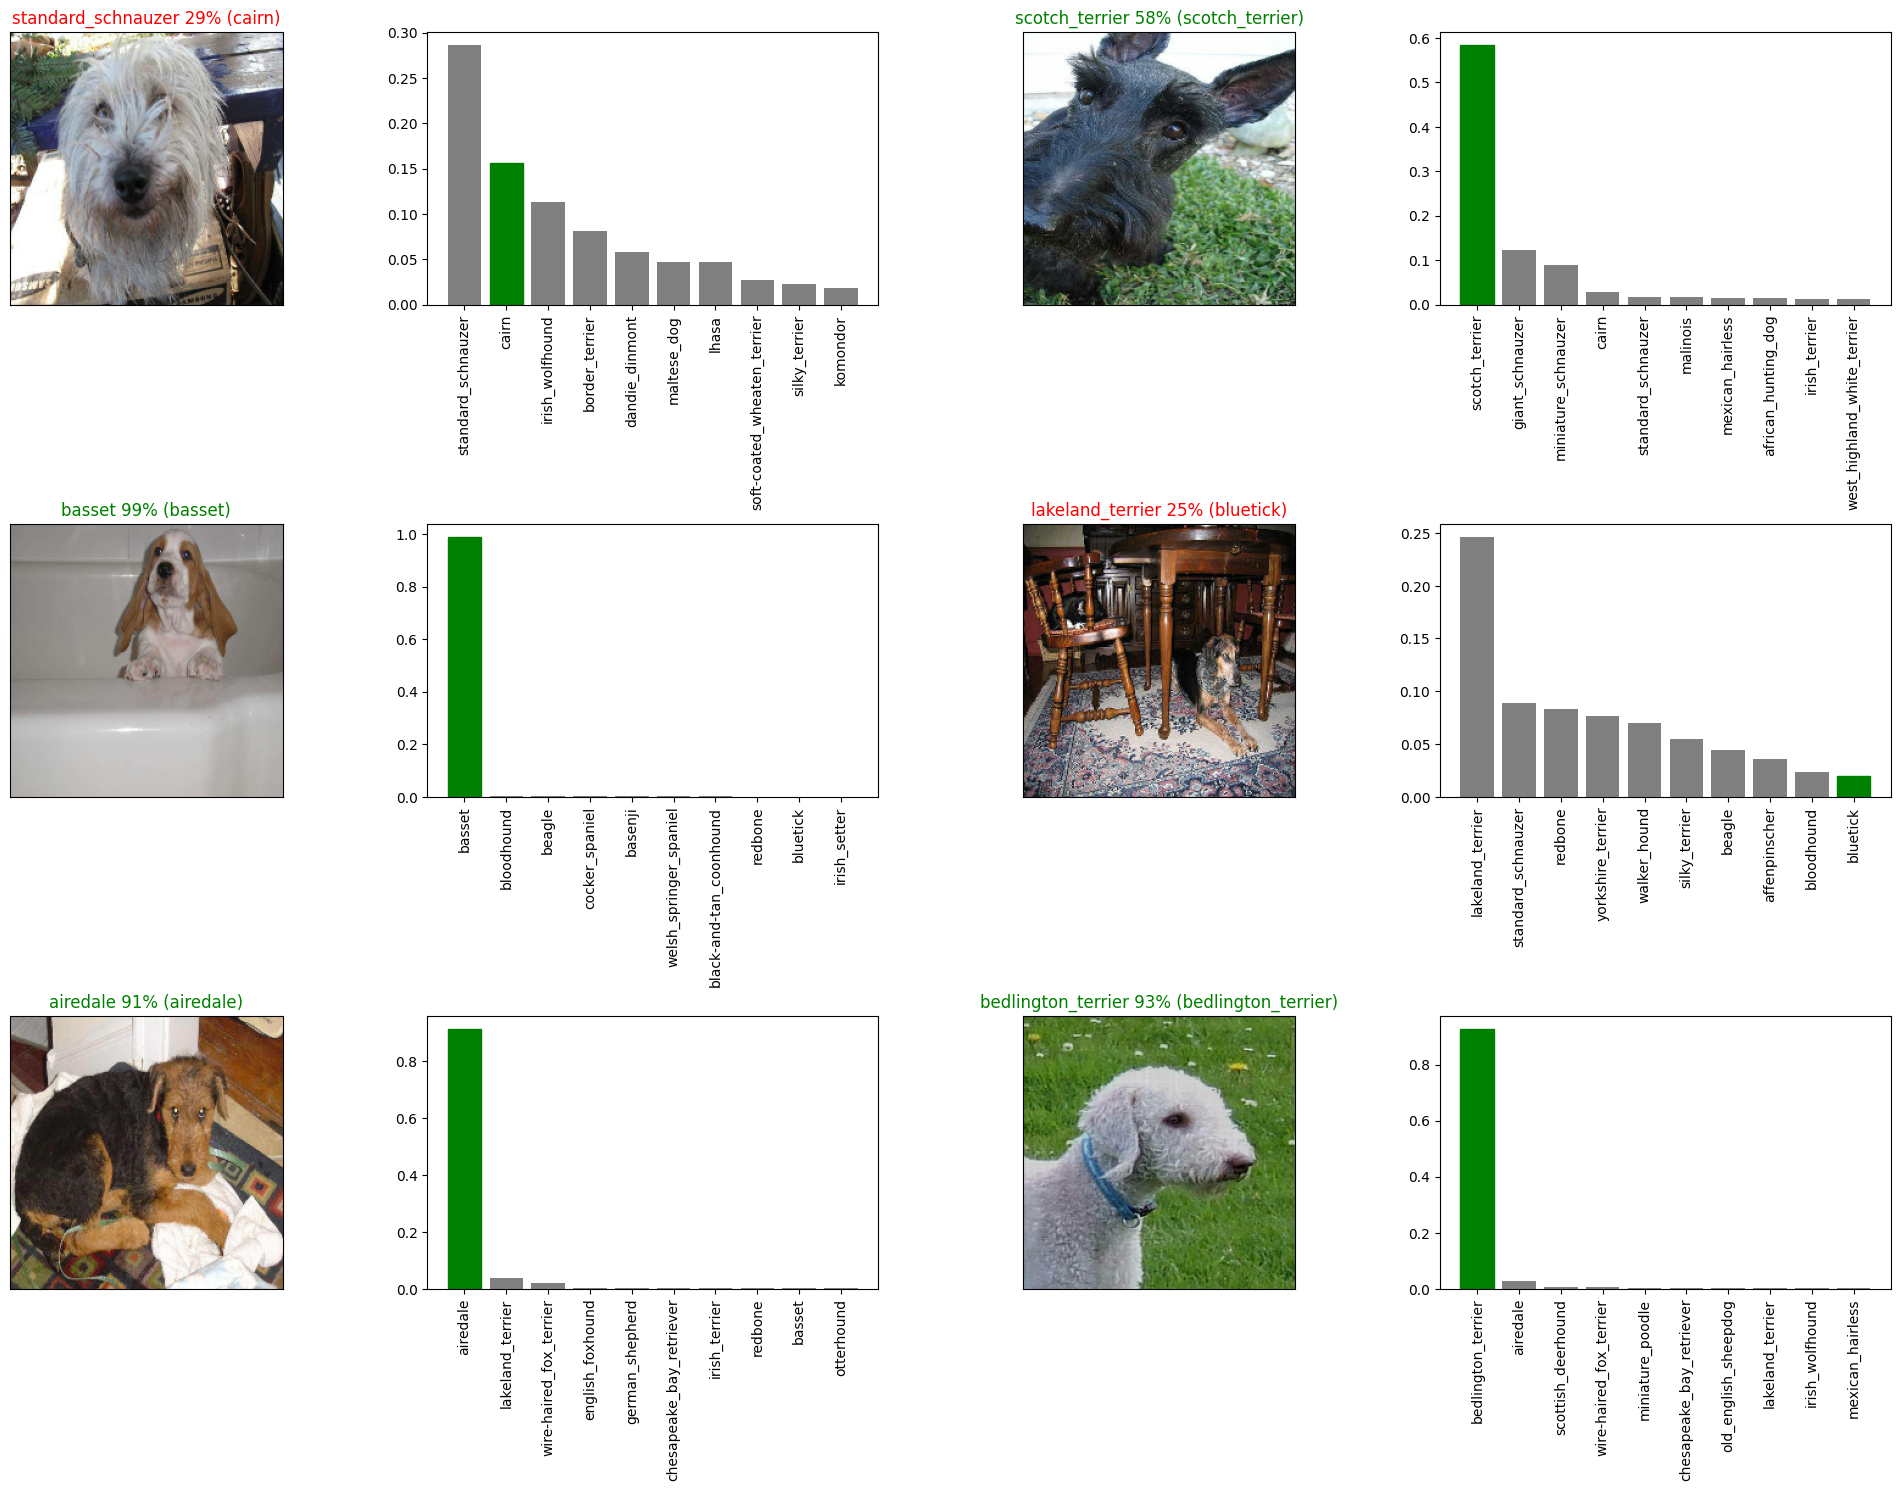

In [61]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# **Saving and Reloading the model**


In [57]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [58]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [59]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Data/models/20230505-10521683283973-1000-images-Adam.h5...


'drive/My Drive/Data/models/20230505-10521683283973-1000-images-Adam.h5'

In [66]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/Data/models/20230505-10521683283973-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/Data/models/20230505-10521683283973-1000-images-Adam.h5


In [60]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 87ms/step - loss: 1.3352 - accuracy: 0.6650


[1.3352051973342896, 0.6650000214576721]

In [67]:

# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 3s 227ms/step - loss: 1.3352 - accuracy: 0.6650


[1.3352051973342896, 0.6650000214576721]

Training a model (on the full data)
Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.

Above, we saved all of the training filepaths to X and all of the training labels to y. Let's check them out.

In [69]:

len(X), len(y)

(10222, 10222)

In [70]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [71]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [72]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [73]:
%tensorboard --logdir drive/My\ Drive/Data/logs

Reusing TensorBoard on port 6006 (pid 8319), started 0:11:46 ago. (Use '!kill 8319' to kill it.)

<IPython.core.display.Javascript object>

In [74]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 49s 125ms/step - loss: 1.3459 - accuracy: 0.6659
Epoch 2/100
320/320 [==============================] - 35s 110ms/step - loss: 0.4066 - accuracy: 0.8800
Epoch 3/100
320/320 [==============================] - 33s 102ms/step - loss: 0.2394 - accuracy: 0.9339
Epoch 4/100
320/320 [==============================] - 34s 106ms/step - loss: 0.1558 - accuracy: 0.9618
Epoch 5/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1058 - accuracy: 0.9786
Epoch 6/100
320/320 [==============================] - 32s 101ms/step - loss: 0.0775 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 33s 102ms/step - loss: 0.0567 - accuracy: 0.9924
Epoch 8/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0463 - accuracy: 0.9939
Epoch 9/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0377 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] - 32s 100m

In [75]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/My Drive/Data/models/20230505-11151683285304-all-images-Adam.h5...


'drive/My Drive/Data/models/20230505-11151683285304-all-images-Adam.h5'

In [77]:
# Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/Data/models/20230505-11151683285304-all-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Data/models/20230505-11151683285304-all-images-Adam.h5


# Predictions on test dataset
To make predictions on the test data, we'll:

Get the test image filenames.

Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since there are no labels with the test images).

Make a predictions array by passing the test data batches to the predict() function.

In [79]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "/content/drive/MyDrive/Dog Vision/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/teste3dd8fc9162f726122ca4cc783114c81.jpg',
 '/content/drive/MyDrive/Dog Vision/teste519e383a6efec0abd285beda04aeac9.jpg',
 '/content/drive/MyDrive/Dog Vision/teste073f14cd5f4c1a62cdb0108cca62fdd.jpg',
 '/content/drive/MyDrive/Dog Vision/teste14211c7b8cba3e46d5802291b765be7.jpg',
 '/content/drive/MyDrive/Dog Vision/teste18db768bc1a9e7e633940dcadacb231.jpg',
 '/content/drive/MyDrive/Dog Vision/teste2a9a7580a1424bc6531b2b7375338db.jpg',
 '/content/drive/MyDrive/Dog Vision/teste2d65ef41ec9a649c8dbd92f0b821163.jpg',
 '/content/drive/MyDrive/Dog Vision/teste67b8da61ba5b55bcc01200ab057c7b0.jpg',
 '/content/drive/MyDrive/Dog Vision/teste190bfb63cf9a7cf1b3ae2ea654a735b.jpg',
 '/content/drive/MyDrive/Dog Vision/teste55fa0c818f485f8e36edfb464c4f129.jpg']

In [80]:

len(test_filenames)

10357

In [81]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


# Making predictions on custom images
To do so, we'll:

Get the filepaths of our own images.

Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.

Pass the custom image data batch to our model's predict() method.

Convert the prediction output probabilities to prediction labels.

Compare the predicted labels to the custom images.


In [85]:
# Get custom image filepaths
custom_path = "drive/My Drive/Data/Dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [86]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [91]:

# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 56ms/step


In [92]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['black-and-tan_coonhound',
 'german_shepherd',
 'american_staffordshire_terrier',
 'samoyed',
 'eskimo_dog']

In [93]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)